Data Loaded in 0.0118 seconds - Rows: 867, Columns: 53
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   State                                              867 non-null    object 
 1   Year                                               867 non-null    int64  
 2   Population.12-17                                   867 non-null    int64  
 3   Population.18-25                                   867 non-null    int64  
 4   Population.26+                                     867 non-null    int64  
 5   Totals.Alcohol.Use Disorder Past Year.12-17        867 non-null    int64  
 6   Totals.Alcohol.Use Disorder Past Year.18-25        867 non-null    int64  
 7   Totals.Alcohol.Use Disorder Past Year.26+          867 non-null    int64  
 8   Rates.Alcohol.Use Disorder Past Yea

<ipython-input-11-78bc1a8a04b3>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_tobacco_usage_sorted.values, y=state_tobacco_usage_sorted.index, palette='viridis')


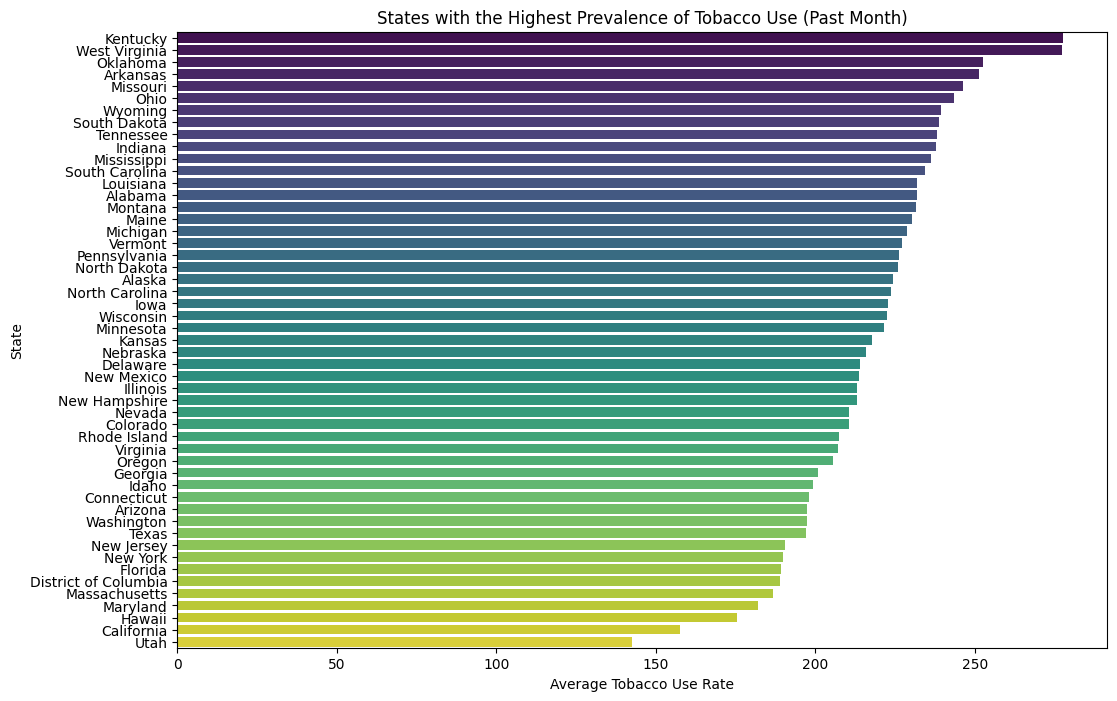

Box Plot Data Prepared in 0.0054 seconds - Rows: 2601, Columns: 3


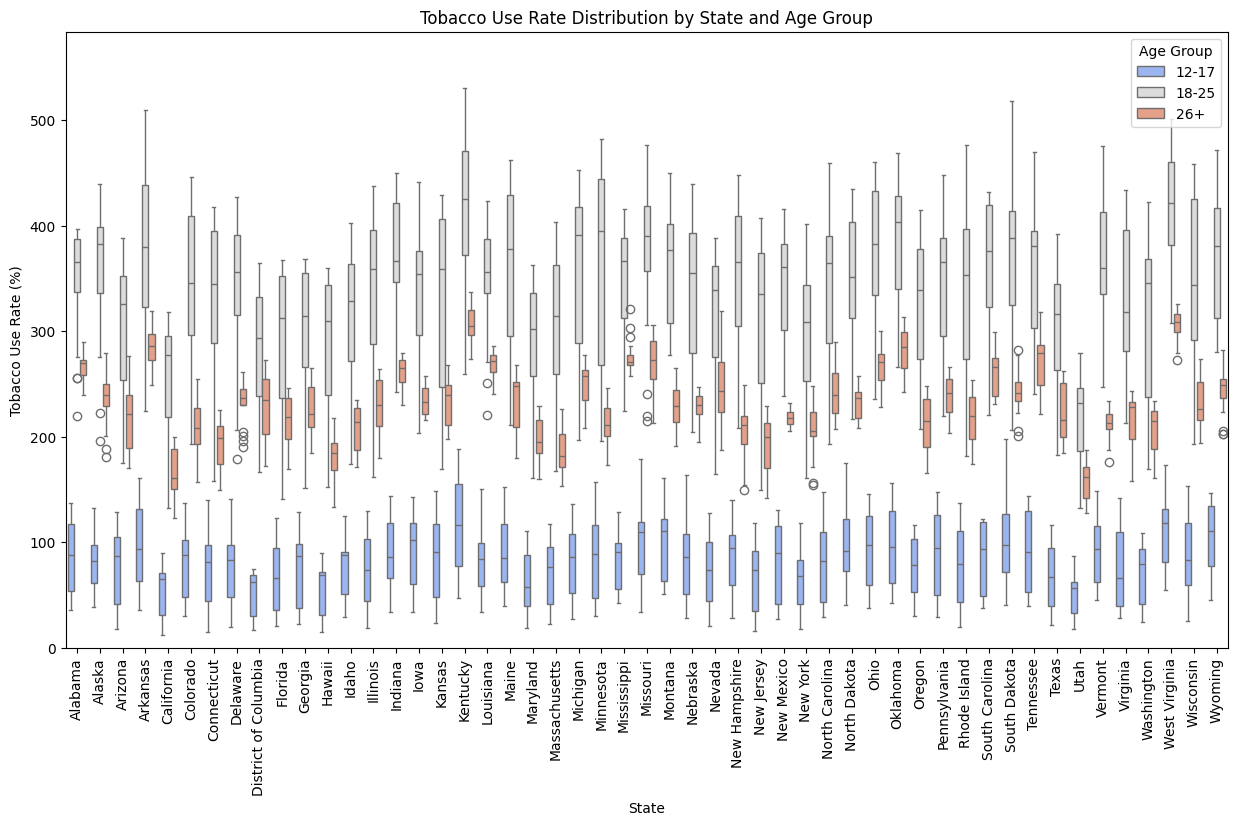


Sample Data for Box Plot:
        State Age Group  Tobacco Use Rate
0     Alabama     12-17           136.906
1      Alaska     12-17           132.517
2     Arizona     12-17           128.357
3    Arkansas     12-17           160.479
4  California     12-17            74.824


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

def print_status(message, start_time, df=None):
    elapsed_time = time.time() - start_time
    if df is not None:
        print(f"{message} in {elapsed_time:.4f} seconds - Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    else:
        print(f"{message} in {elapsed_time:.4f} seconds")

# Start timer for loading
start_time = time.time()

# Load the dataset
data = pd.read_csv('drugs.csv')
print_status("Data Loaded", start_time, data)
print(data.info())

# Clean the data
start_time = time.time()
data.fillna(0, inplace=True)
print_status("Data Cleaned", start_time)

# Subset the columns related to tobacco use
start_time = time.time()
tobacco_columns = [
    'State',
    'Rates.Tobacco.Cigarette Past Month.12-17',
    'Rates.Tobacco.Cigarette Past Month.18-25',
    'Rates.Tobacco.Cigarette Past Month.26+'
]

tobacco_data = data[tobacco_columns]
print_status("Subset Data", start_time, tobacco_data)

# Group data by state
start_time = time.time()
state_tobacco_usage = tobacco_data.groupby('State')[[
    'Rates.Tobacco.Cigarette Past Month.12-17',
    'Rates.Tobacco.Cigarette Past Month.18-25',
    'Rates.Tobacco.Cigarette Past Month.26+'
]].mean()
print_status("Data Grouped", start_time, state_tobacco_usage)

# Sort the data
start_time = time.time()
state_tobacco_usage_sorted = state_tobacco_usage.mean(axis=1).sort_values(ascending=False)
print_status("Data Sorted", start_time)

# Visualization 1: Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=state_tobacco_usage_sorted.values, y=state_tobacco_usage_sorted.index, palette='viridis')
plt.title('States with the Highest Prevalence of Tobacco Use (Past Month)')
plt.xlabel('Average Tobacco Use Rate')
plt.ylabel('State')
plt.show()

# Prepare the data for the box plot
start_time = time.time()
tobacco_melted = tobacco_data.melt(id_vars=['State'],
                                   var_name='Age Group',
                                   value_name='Tobacco Use Rate')

# Shorten labels
label_map = {
    'Rates.Tobacco.Cigarette Past Month.12-17': '12-17',
    'Rates.Tobacco.Cigarette Past Month.18-25': '18-25',
    'Rates.Tobacco.Cigarette Past Month.26+': '26+'
}
tobacco_melted['Age Group'] = tobacco_melted['Age Group'].map(label_map)

print_status("Box Plot Data Prepared", start_time, tobacco_melted)

# Visualization 2: Box Plot by State
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Tobacco Use Rate', hue='Age Group', data=tobacco_melted, palette='coolwarm')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Adjust y-axis range
plt.ylim(0, tobacco_melted['Tobacco Use Rate'].max() * 1.1)

# Titles and labels
plt.title('Tobacco Use Rate Distribution by State and Age Group')
plt.xlabel('State')
plt.ylabel('Tobacco Use Rate (%)')
plt.legend(title="Age Group", loc='upper right')
plt.show()

# Display final data sample
print("\nSample Data for Box Plot:")
print(tobacco_melted.head())
